##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# An introduction to ANN

PS: Some of this has been inspired by the recent Udacity course: https://classroom.udacity.com/courses/ud187.

#Diode Equation (assume you are Shockley)

Lets think of the way  William Shockley might have found the diode equation. All he had with him were some measurements of $I_D$ given values for $V_D$.

We already know that the equation that he found to be the the best is $I_D = I_O (e^{V_D/V_T} - 1)$.

Lets assume that we have the following readings of $V_D$ = (0, 0.2, 0.4, 0.6, 0.7) .

Lets cheat and find the values for $I_D$. Assume that we have got these current values from complicated lab-based experiments. We are asked to act Shockly and find a model which can churn out values of $I_D$ given any value of $V_D$.

In [1]:
import matplotlib as mp
import numpy as np

I_o = 3.2e-12
v_d = np.array([0,0.1, 0.2,0.22, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8],  dtype=float)
i_d = I_o*(np.exp(v_d/0.025) - 1)
print(i_d)


[0.00000000e+00 1.71514080e-10 9.53586556e-09 2.12263808e-08
 5.20812133e-07 3.84833051e-06 2.84355505e-05 2.10111898e-04
 1.55252862e-03 1.14717211e-02 8.47651908e-02 6.26334750e-01
 4.62802261e+00 3.41967187e+01 2.52681473e+02]


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

The first step in any machine learning activitiy is to check how does the data "look" like!  

Dont forget that a lot of our intuitive gut feeling is based around vision. (We will talk more about this later.) This is exactly why methods like principal component analysis are extremely powerful.

So lets plot it.

In [8]:
import matplotlib.pyplot as plt

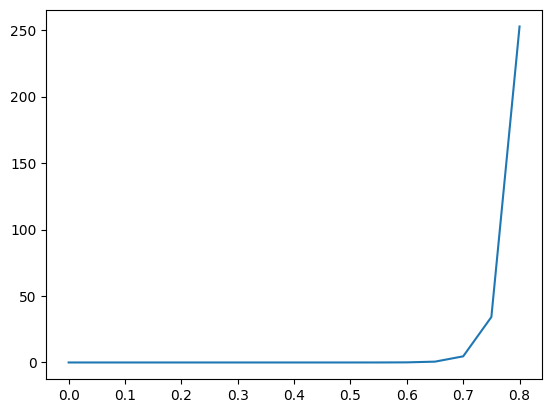

In [9]:
plt.plot(v_d,i_d)

So from the plot what do you think the equation might be? Maybe its quadratic? Maybe its exponential. So if its exponential then it will look like $I_D = x (e^{yV_D} + p)$. So to get this trick to work we need to find these three **parameters**  and thats why such methods are called .....guess.....**parametric methods** (we will discuss more about this later!)

How would you find these parameters? What are the possible issues and benefits of this method?

ANSWER:
You can determine x,y,p by fitting the equation to the experimental data. There are several ways to do this: curve fitting, linearization if possible and manual tuning. Good things about it are e.g. interpretability and efficiency, but on the other hand it requires a good model form. If your assumed equation is wrong, no parameter values will make it fit well. Also nonlinear fitting can be unstable and there is limited felxibility. 

Now lets jump to the other type of trick where we do not impose any "model" on the data. Rather, we expect the data to lead our way!

**In God we trust, rest others bring data!**...late Edwards Deming (father of lean startup)

Lets build a Neural Network to model this. I.e. it should be able to predict the current given the voltage.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.



In [11]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 2.4/331.9 MB 9.0 MB/s eta 0:00:37
    --------------------------------------- 8.1/331.9 MB 18.7 MB/s eta 0:00:18
   --- ------------------------------------ 25.4/331.9 MB 38.4 MB/s eta 0:00:08
   --- ------------------------------------ 30.4/331.9 MB 42.0 MB/s eta 0:00:08
   ----- ---------------------------------- 43.0/331.9 MB 40.2 MB/s eta 0:00:08
   ------ --------------------------------- 54.5/331.9 MB 42.4 MB/s eta 0:00:07
   ------- -------------------------------- 65.8/331.9 MB 43.7 MB/s eta 0:00:07
   --------- ------------------------------ 78.6/331.9 MB 46.0 MB/s eta 0:00:06
   ----------- ---------------------------- 91.8/331.9 MB 48.0 MB/s eta 0:00:06
   ----------- --------------------------- 102.0/331.9 MB 48.2 MB/s eta 0:00:05
   ------------- ------------------------- 113.5/331.9 MB 48.

In [12]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

import numpy as np

c:\Users\Klaudia\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Klaudia\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Klaudia\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violat

## Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm, given a set of inputs and outputs. Since the task here is to create a model that can give diode current from the voltage, we shall use $I_0$ as the output and $V_D$ as the input.

### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the diode voltage in V.

 - **Labels** — The output our model predicts. In this case, a single value — the diode current in A.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `V_D` and `I_D` at a specific index.


## Create the model

Next create the model. We will use a very simple model, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing diode voltage.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output — a single float value representing diode current. (In a multi-layered network, the size and shape of the later would need to match the `input_shape` of the next layer.)


In [13]:
#l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
l0 = tf.keras.layers.Dense(units=100, activation='tanh', input_shape=[1])

c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The **Sequential model** definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [14]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".) REF: https://keras.io/losses/

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss. REF: https://keras.io/optimizers/


In [15]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting $v_D$ to $I_D$.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:



One part of the Optimizer you may need to think about when building your own models is the learnign rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1.

https://keras.io/models/sequential/

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in v_d values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the i_d values. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [36]:
# Reshape input and target data
v_d = v_d.reshape(-1, 1)  # Ensure shape is (15, 1)
i_d = i_d.reshape(-1, 1)  # Ensure shape is (15, 1)

# Define the model (use tf.keras to reference Sequential and Dense)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),  # Input shape matches v_d
    tf.keras.layers.Dense(1)  # Output shape matches i_d
])

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(v_d, i_d, epochs=5000, verbose=False)

In [16]:
history = model.fit(v_d, i_d, epochs=5000, verbose=False)
print("Finished training the model")

InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Klaudia\miniconda3\Lib\asyncio\base_events.py", line 645, in run_forever

  File "c:\Users\Klaudia\miniconda3\Lib\asyncio\base_events.py", line 1999, in _run_once

  File "c:\Users\Klaudia\miniconda3\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3098, in run_cell

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3153, in _run_cell

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3362, in run_cell_async

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3607, in run_ast_nodes

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3667, in run_code

  File "C:\Users\Klaudia\AppData\Local\Temp\ipykernel_13124\1890384725.py", line 1, in <module>

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 399, in fit

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 241, in function

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in multi_step_on_iterator

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 125, in wrapper

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 134, in one_step_on_data

  File "c:\Users\Klaudia\miniconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 81, in train_step

Incompatible shapes: [15] vs. [15,100]
	 [[{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]] [Op:__inference_multi_step_on_iterator_608]

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.



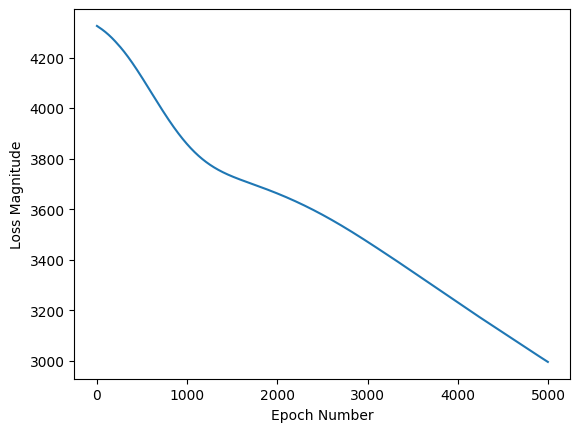

In [37]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationshop between `v_d` and `i_d`. You can use the predict method to have it calculate the diode current. But unfortunately the error it converges to seems pretty bad. Lets try to use it anyway.

So, for example, if the diode voltage is 0.72 V then we expect a diode current of 10.3A. Lets see what we get.

In [38]:
# pass a numpy array with the correct shape (batch_size, features)
print(model.predict(np.array([[0.72]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[46.993233]]


##Post-mortem

Is this good? Hmmmmmmmm. Lets run another time.....But the error seems to be pretty high. What can we do now?

Mark that the model we used is linear. And we are trying to learn something which is exponential! Can we not add some nonlinearlity into the model? Try by adding a nonlinear activation function in the model and see what happens.

The error seems to be going down. Should we increase the number of epochs? Lets try that as well.






In [33]:
tf.keras.layers.Dense(10, activation='tanh', input_shape=(1,))
model.add(tf.keras.layers.Dense(1))  # Example for a single output
history = model.fit(v_d[:5], i_d[:5], epochs=10, verbose=True)      
# pass a numpy array with the correct shape (batch_size, features)
print(model.predict(np.array([[0.72]])))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4371
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4257
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4002
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4073
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3975
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3697
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3649
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3538
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3266
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3158
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[-0.585095]]


Yes, adding nonlinearity (like 'relu' or 'tanh') is exactly how you make the model learn exponential shapes.

In [35]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)
history = model.fit(v_d, i_d, epochs=10000, verbose=False, validation_split=0.2, callbacks=[early_stop])
print(model.predict(np.array([[0.72]])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[-0.7348087]]


Yes, you can try more epochs — but monitor validation loss and use early stopping.

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer.

In [39]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-3.88610029e+00,  1.42926669e+00,  2.28990734e-01,
        -3.52952749e-01, -5.02009058e+00,  3.64188254e-01,
         1.26461536e-01, -1.05121291e+00, -2.94338286e-01,
         2.58814424e-01,  3.90587091e-01, -3.81009817e-01,
         7.66491652e+00,  3.32629591e-01, -2.80200100e+00,
         3.70465547e-01,  4.81922102e+00,  3.84852022e-01,
         4.60814047e+00, -5.43650866e+00, -3.45381886e-01,
         3.93777490e-01, -6.93342781e+00,  3.73209178e-01,
         3.84653866e-01,  3.92420173e-01, -1.94605780e+00,
        -3.59427571e-01, -9.29584980e-01, -2.96130323e+00,
         3.51122618e-01, -1.66105926e+00,  3.76688182e-01,
         3.92267942e-01,  3.62321764e-01, -3.83170813e-01,
        -3.82352978e-01, -3.65840554e-01,  3.84345293e-01,
         1.47387576e+00, -3.66112947e-01,  1.17542422e+00,
         3.66448212e+00,  4.11220932e+00,  1.77158880e+00,
        -3.27734083e-01, -3.85483205e-01,  1.75823539e-01,
         3.78183961e-01,

### Some more experiments

Something is not going well. What can we do? Can we add more layers?

Universal approximation theorem.
A single hidden layer can approximate any function!

Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[8.481267]]


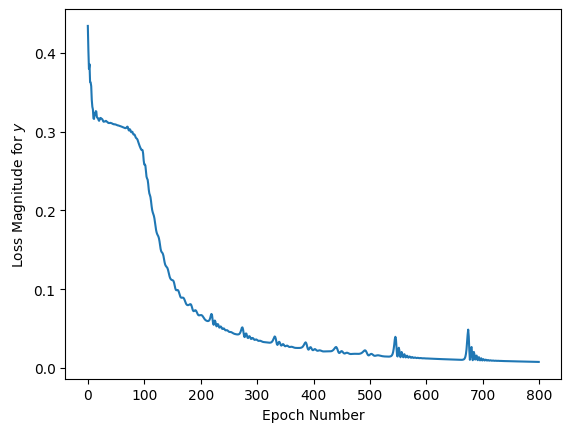

In [41]:
l0 = tf.keras.layers.Dense(units=1000, activation='tanh',input_shape=[1])
l1 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(v_d, i_d, epochs=800, verbose=False)
print("Finished training the model")
print(model.predict(np.array([[0.72]])))
#print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([0.72])))
#print("These are the l0 variables: {}".format(l0.get_weights()))
#print("These are the l1 variables: {}".format(l1.get_weights()))
#print("These are the l2 variables: {}".format(l2.get_weights()))
ppp = history.history['loss']
qqq = np.multiply(ppp,0.0001)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude for $y$")
plt.plot(qqq)

##Play-around

We still did not get anything decent. But the theory says it should work. Try increasing the number of nodes in the hidden layer and see what happens.

So which is better? Parametric or data-centered ANN approach?

What else did you learn from this?

When fitting the diode I−V characteristics, the parametric approach (using an exponential equation) gives better, more stable results with fewer parameters.
The ANN can, in theory, approximate the same behavior, but with very limited data and without explicit physical constraints, it struggles to converge or generalize well.
Increasing the number of hidden nodes or epochs helps only slightly, since the model lacks enough data and physical guidance.